In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

import pandas
import numpy
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.graphics.gofplots as gofplots
import statsmodels.formula.api as sm
import datetime

COLOR_REP = '#E24A33'
COLOR_DEM = '#348ABD'
COLOR_ALT = '#777777'

In [3]:
data = pandas.read_csv('all_data.csv', index_col='date', parse_dates=True)

In [4]:
data = data[data.index > datetime.datetime(1946, 1, 1)]
data

,dem_pres,total_senate,dem_senate,rep_senate,total_house,dem_house,rep_house,gdp_r,gdp_n,cpi,fed_sur,fed_rec,fed_out,def_pct_gdp,cpi_inflation,gdp_r_growth,gdp_n_growth,fed_sur_pct_gdp
date,,,,,,,,,,,,,,,,,,
1947-01-01,1,96,57,38,435,243,190,1939.4,249.9,21.500,4018.0,38514.0,34496.0,8.5,0.181319,-0.010964,0.097015,16.078431
1948-01-01,1,96,45,51,435,188,246,2020.0,274.8,23.700,11796.0,41560.0,29764.0,7.6,0.102326,0.041559,0.099640,42.925764
1949-01-01,1,96,45,51,435,188,246,2008.9,272.8,24.000,580.0,39415.0,38835.0,8.2,0.012658,-0.005495,-0.007278,2.126100
1950-01-01,1,96,54,42,435,263,171,2184.0,300.2,23.500,-3119.0,39443.0,42562.0,7.6,-0.020833,0.087162,0.100440,-10.389740
1951-01-01,1,96,54,42,435,263,171,2360.0,347.3,25.400,6102.0,51616.0,45514.0,12.6,0.080851,0.080586,0.156895,17.569824
1952-01-01,1,96,48,47,435,234,199,2456.1,367.7,26.500,-1519.0,66167.0,67686.0,15.6,0.043307,0.040720,0.058739,-4.131085
1953-01-01,0,96,48,47,435,234,199,2571.4,389.7,26.600,-6493.0,69608.0,76101.0,15.7,0.003774,0.046944,0.059831,-16.661535
1954-01-01,0,96,46,48,435,213,221,2556.9,391.1,26.900,-1154.0,69701.0,70855.0,13.9,0.011278,-0.005639,0.003593,-2.950652
1955-01-01,0,96,46,48,435,213,221,2739.0,426.2,26.700,-2993.0,65451.0,68444.0,12.3,-0.007435,0.071219,0.089747,-7.022525


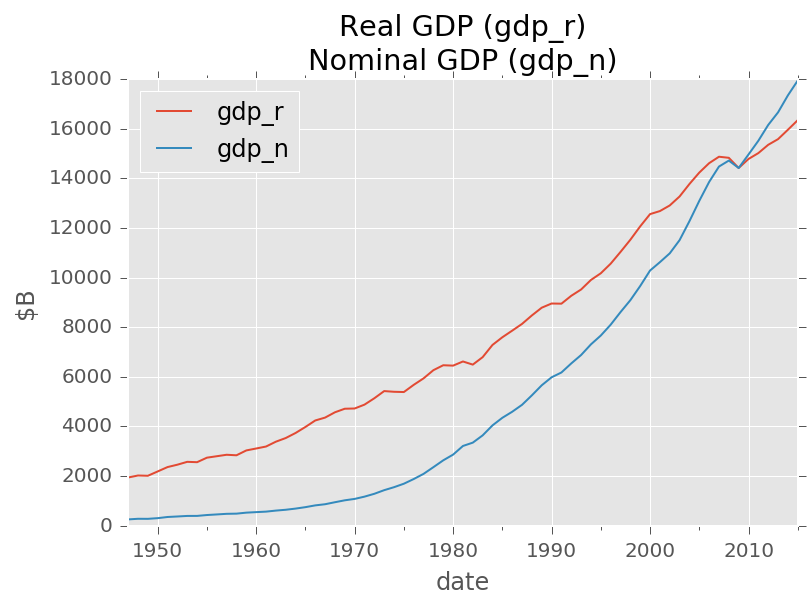

In [5]:
data[['gdp_r', 'gdp_n']].plot()
plt.title('Real GDP (gdp_r)\nNominal GDP (gdp_n)')
plt.ylabel('$B')
plt.show()

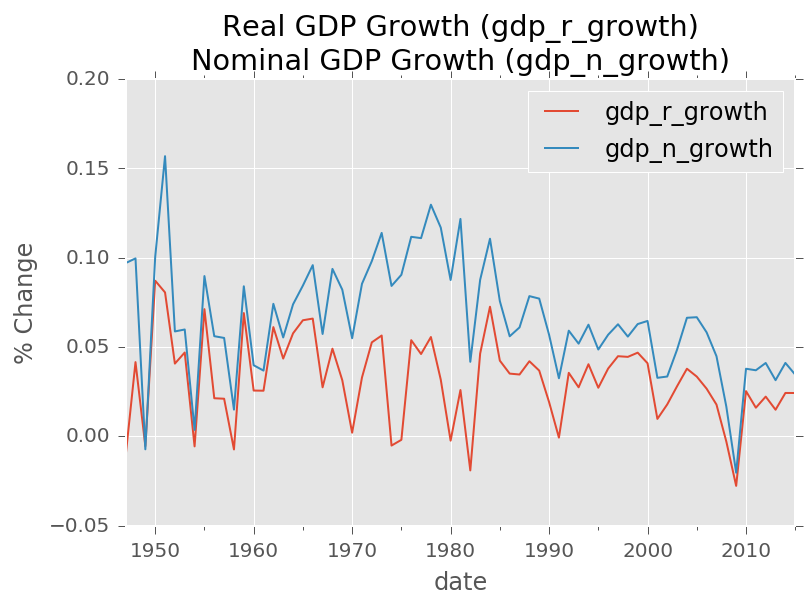

In [6]:
data[['gdp_r_growth', 'gdp_n_growth']].plot()
plt.title('Real GDP Growth (gdp_r_growth)\nNominal GDP Growth (gdp_n_growth)')
plt.ylabel('% Change')
plt.show()

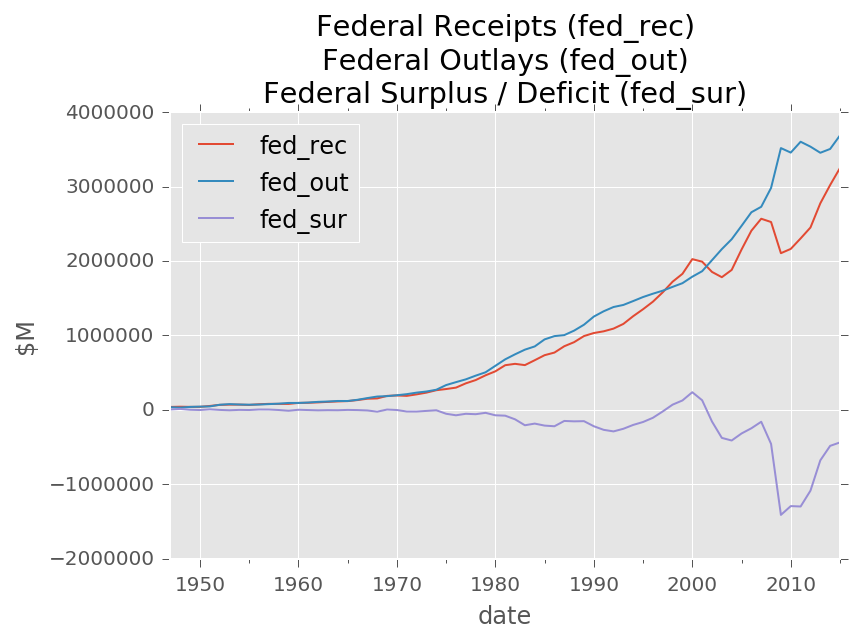

In [7]:
data[['fed_rec', 'fed_out', 'fed_sur']].plot()
plt.title('Federal Receipts (fed_rec)\nFederal Outlays (fed_out)\nFederal Surplus / Deficit (fed_sur)')
plt.ylabel('$M')
plt.show()

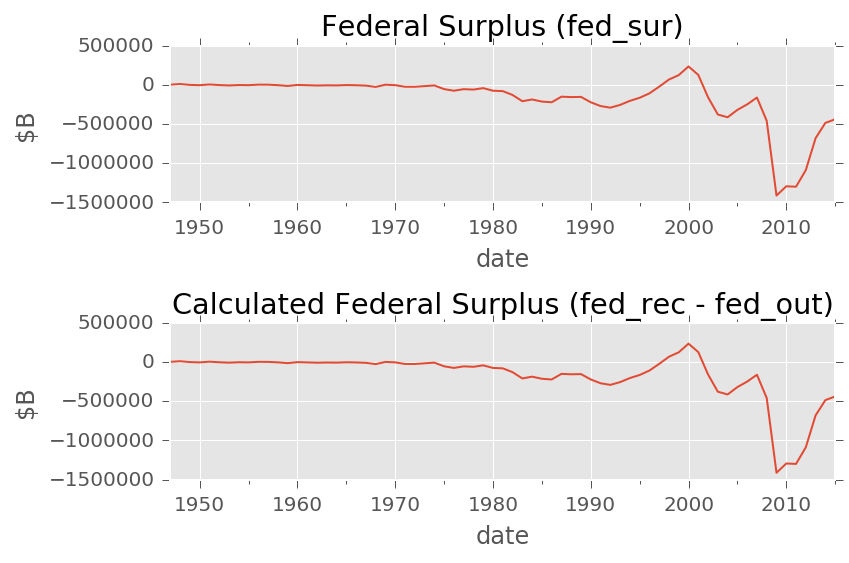

In [8]:
plt.subplot(2, 1, 1)
data['fed_sur'].plot()
plt.ylabel('$B')
plt.title('Federal Surplus (fed_sur)')
plt.subplot(2, 1, 2)
(data['fed_rec'] - data['fed_out']).plot()
plt.ylabel('$B')
plt.title('Calculated Federal Surplus (fed_rec - fed_out)')
plt.tight_layout()

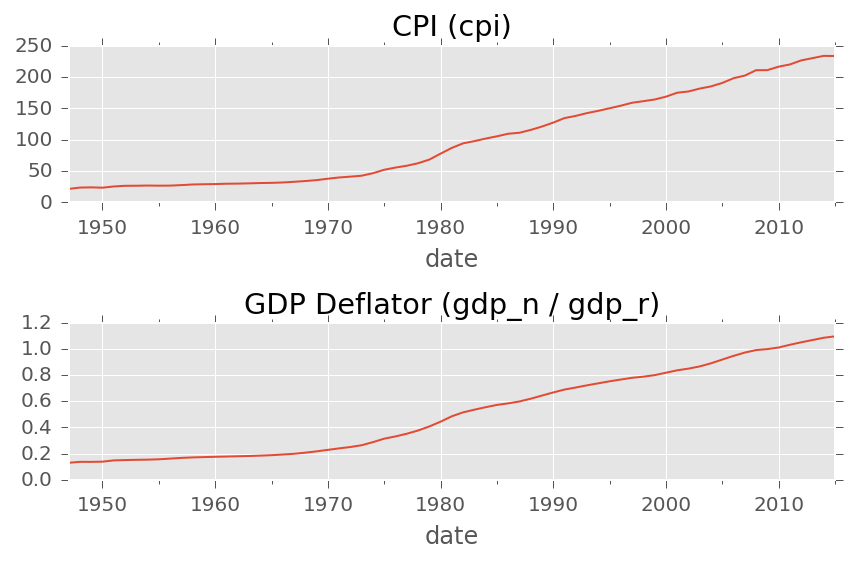

In [9]:
plt.subplot(2, 1, 1)
data['cpi'].plot()
plt.title('CPI (cpi)')
plt.subplot(2, 1, 2)
(data['gdp_n'] / data['gdp_r']).plot()
plt.title('GDP Deflator (gdp_n / gdp_r)')
plt.tight_layout()

In [10]:
def plot_line_with_background(line_data_name, background_binary_name, dataframe, title, ylabel):
    dataframe[line_data_name].plot(color=COLOR_ALT)
    if numpy.max(dataframe[line_data_name]) > 0:
        plt.bar(dataframe.index, dataframe[background_binary_name] * numpy.max(dataframe[line_data_name]), color=COLOR_DEM, align='center', alpha=0.2)
        plt.bar(dataframe.index, (1 - dataframe[background_binary_name]) * numpy.max(dataframe[line_data_name]), color=COLOR_REP, align='center', alpha=0.2)
    if numpy.min(dataframe[line_data_name]) < 0:
        plt.bar(dataframe.index, dataframe[background_binary_name] * numpy.min(dataframe[line_data_name]), color=COLOR_DEM, align='center', alpha=0.2)
        plt.bar(dataframe.index, (1 - dataframe[background_binary_name]) * numpy.min(dataframe[line_data_name]), color=COLOR_REP, align='center', alpha=0.2)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

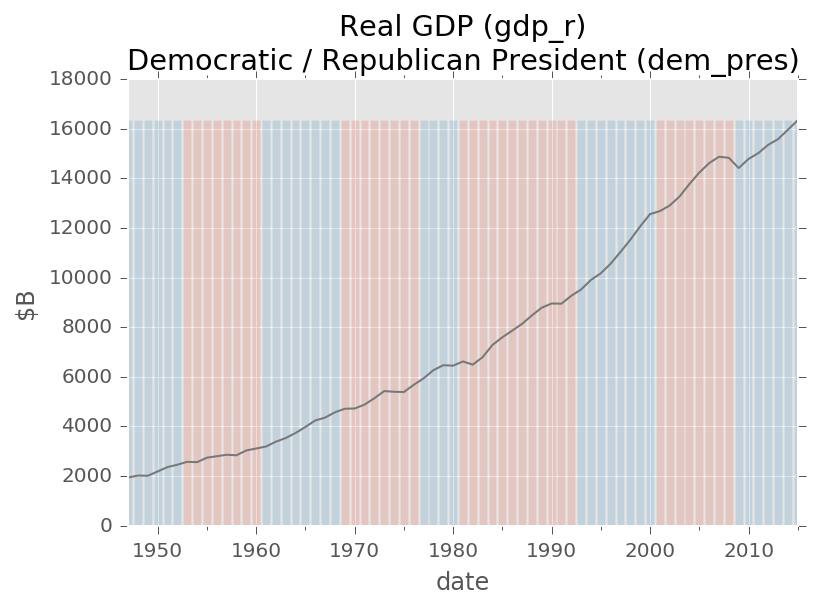

In [11]:
plot_line_with_background('gdp_r', 'dem_pres', data, 'Real GDP (gdp_r)\nDemocratic / Republican President (dem_pres)', '$B')

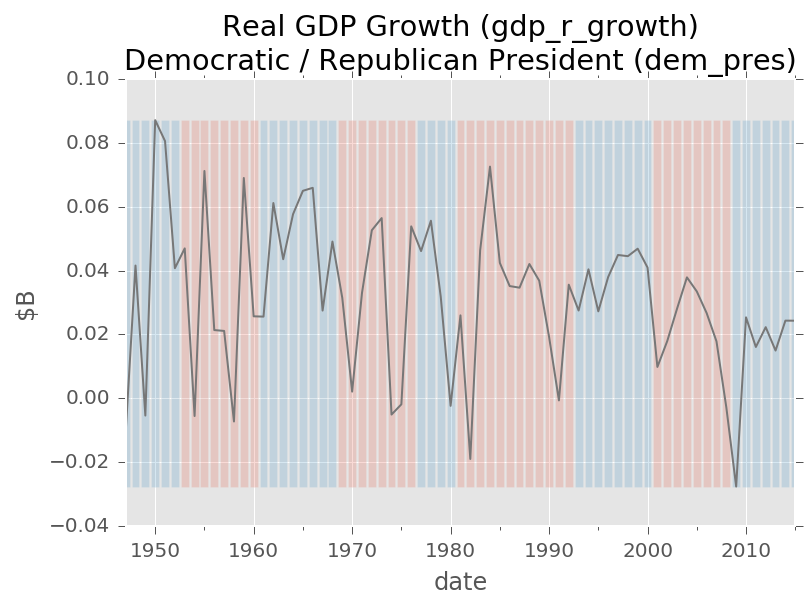

In [12]:
plot_line_with_background('gdp_r_growth', 'dem_pres', data, 
                          'Real GDP Growth (gdp_r_growth)\nDemocratic / Republican President (dem_pres)', '$B')

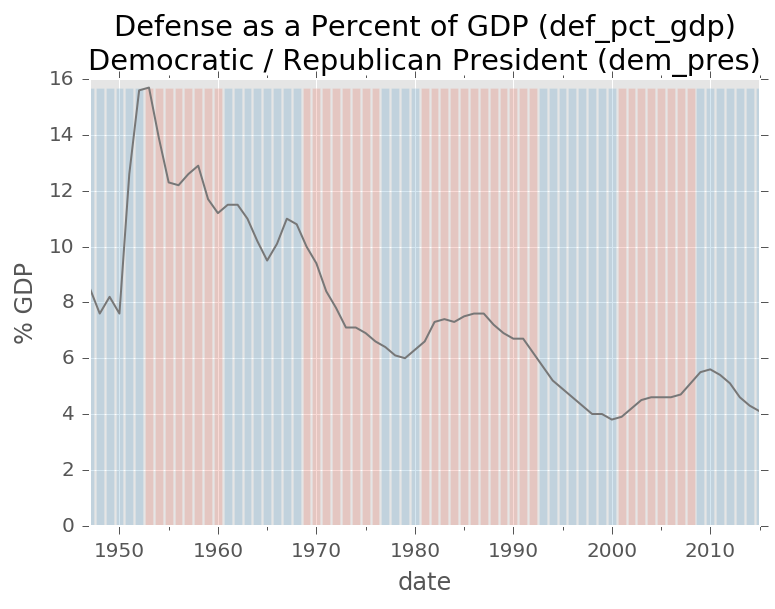

In [13]:
plot_line_with_background('def_pct_gdp', 'dem_pres', data, 
                          'Defense as a Percent of GDP (def_pct_gdp)\nDemocratic / Republican President (dem_pres)',
                          '% GDP')

In [14]:
data['gdp_r_growth_lag1'] = data['gdp_r'].pct_change().shift(1)
data['gdp_r_growth_lag2'] = data['gdp_r'].pct_change().shift(2)
data['gdp_r_growth_lag3'] = data['gdp_r'].pct_change().shift(3)

In [15]:
data['def_pct_gdp_lag1'] = data['def_pct_gdp'].pct_change().shift(1)
data['def_pct_gdp_lag2'] = data['def_pct_gdp'].pct_change().shift(2)

In [16]:
data['fed_sur_pct_gdp_growth'] = data['fed_sur_pct_gdp'].diff()

In [17]:
data['great_depression'] = 0
data['great_depression'][data.index < datetime.datetime(1938, 1, 1)] = 1
data['ww2'] = 0
data['ww2'][(data.index < datetime.datetime(1946, 1, 1)) & (data.index > datetime.datetime(1939, 1, 1))] = 1

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
data['dem_senate_pct'] = data['dem_senate'] / data['total_senate']
data['dem_house_pct'] = data['dem_house'] / data['total_house']

In [19]:
data

,dem_pres,total_senate,dem_senate,rep_senate,total_house,dem_house,rep_house,gdp_r,gdp_n,cpi,...,gdp_r_growth_lag1,gdp_r_growth_lag2,gdp_r_growth_lag3,def_pct_gdp_lag1,def_pct_gdp_lag2,fed_sur_pct_gdp_growth,great_depression,ww2,dem_senate_pct,dem_house_pct
date,,,,,,,,,,,,,,,,,,,,,
1947-01-01,1,96,57,38,435,243,190,1939.4,249.9,21.500,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.593750,0.558621
1948-01-01,1,96,45,51,435,188,246,2020.0,274.8,23.700,...,NaN,NaN,NaN,NaN,NaN,26.847333,0,0,0.468750,0.432184
1949-01-01,1,96,45,51,435,188,246,2008.9,272.8,24.000,...,0.041559,NaN,NaN,-0.105882,NaN,-40.799664,0,0,0.468750,0.432184
1950-01-01,1,96,54,42,435,263,171,2184.0,300.2,23.500,...,-0.005495,0.041559,NaN,0.078947,-0.105882,-12.515840,0,0,0.562500,0.604598
1951-01-01,1,96,54,42,435,263,171,2360.0,347.3,25.400,...,0.087162,-0.005495,0.041559,-0.073171,0.078947,27.959565,0,0,0.562500,0.604598
1952-01-01,1,96,48,47,435,234,199,2456.1,367.7,26.500,...,0.080586,0.087162,-0.005495,0.657895,-0.073171,-21.700909,0,0,0.500000,0.537931
1953-01-01,0,96,48,47,435,234,199,2571.4,389.7,26.600,...,0.040720,0.080586,0.087162,0.238095,0.657895,-12.530449,0,0,0.500000,0.537931
1954-01-01,0,96,46,48,435,213,221,2556.9,391.1,26.900,...,0.046944,0.040720,0.080586,0.006410,0.238095,13.710883,0,0,0.479167,0.489655
1955-01-01,0,96,46,48,435,213,221,2739.0,426.2,26.700,...,-0.005639,0.046944,0.040720,-0.114650,0.006410,-4.071873,0,0,0.479167,0.489655


In [20]:
data = data.dropna()
data

,dem_pres,total_senate,dem_senate,rep_senate,total_house,dem_house,rep_house,gdp_r,gdp_n,cpi,...,gdp_r_growth_lag1,gdp_r_growth_lag2,gdp_r_growth_lag3,def_pct_gdp_lag1,def_pct_gdp_lag2,fed_sur_pct_gdp_growth,great_depression,ww2,dem_senate_pct,dem_house_pct
date,,,,,,,,,,,,,,,,,,,,,
1951-01-01,1,96,54,42,435,263,171,2360.0,347.3,25.400,...,0.087162,-0.005495,0.041559,-0.073171,0.078947,27.959565,0,0,0.562500,0.604598
1952-01-01,1,96,48,47,435,234,199,2456.1,367.7,26.500,...,0.080586,0.087162,-0.005495,0.657895,-0.073171,-21.700909,0,0,0.500000,0.537931
1953-01-01,0,96,48,47,435,234,199,2571.4,389.7,26.600,...,0.040720,0.080586,0.087162,0.238095,0.657895,-12.530449,0,0,0.500000,0.537931
1954-01-01,0,96,46,48,435,213,221,2556.9,391.1,26.900,...,0.046944,0.040720,0.080586,0.006410,0.238095,13.710883,0,0,0.479167,0.489655
1955-01-01,0,96,46,48,435,213,221,2739.0,426.2,26.700,...,-0.005639,0.046944,0.040720,-0.114650,0.006410,-4.071873,0,0,0.479167,0.489655
1956-01-01,0,96,48,47,435,232,203,2797.4,450.1,26.800,...,0.071219,-0.005639,0.046944,-0.115108,-0.114650,15.791687,0,0,0.500000,0.533333
1957-01-01,0,96,48,47,435,232,203,2856.3,474.9,27.600,...,0.021322,0.071219,-0.005639,-0.008130,-0.115108,-1.584492,0,0,0.500000,0.533333
1958-01-01,0,96,49,47,435,234,201,2835.3,482.0,28.600,...,0.021055,0.021322,0.071219,0.032787,-0.008130,-12.929484,0,0,0.510417,0.537931
1959-01-01,0,96,49,47,435,234,201,3031.0,522.5,29.000,...,-0.007352,0.021055,0.021322,0.023810,0.032787,-18.846574,0,0,0.510417,0.537931


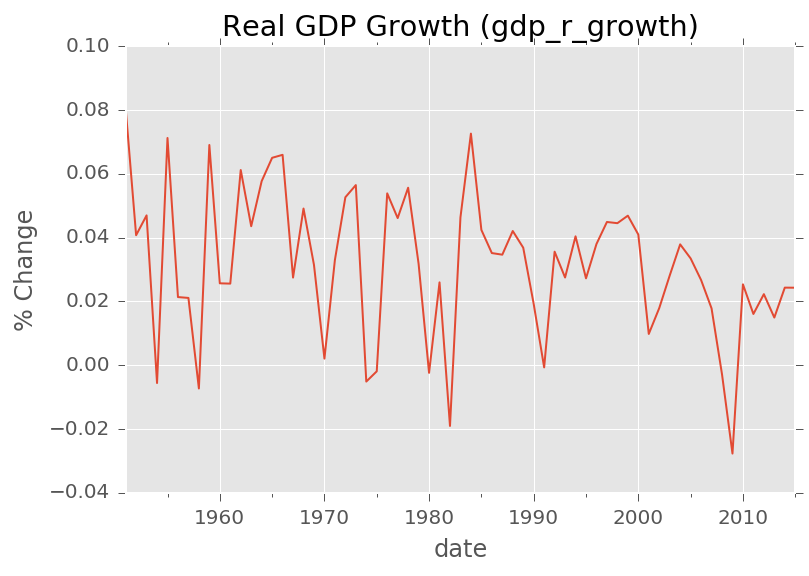

In [21]:
data['gdp_r_growth'].plot()
plt.title('Real GDP Growth (gdp_r_growth)')
plt.ylabel('% Change')
plt.show()

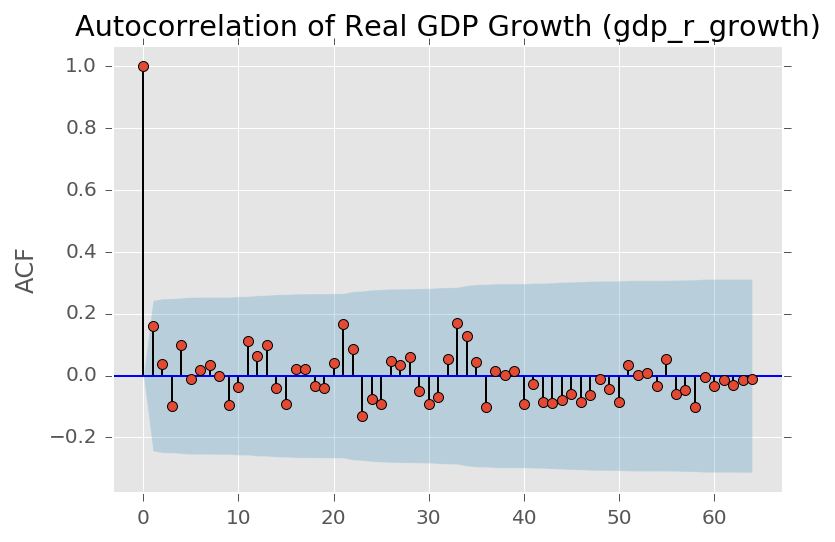

In [22]:
tsaplots.plot_acf(data['gdp_r_growth'])
plt.title('Autocorrelation of Real GDP Growth (gdp_r_growth)')
plt.ylabel('ACF')
plt.show()

In [23]:
model = sm.ols(formula='''
gdp_r_growth ~ dem_pres
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp_r_growth   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.318
Date:                Mon, 20 Jun 2016   Prob (F-statistic):              0.133
Time:                        00:29:57   Log-Likelihood:                 155.22
No. Observations:                  65   AIC:                            -306.4
Df Residuals:                      63   BIC:                            -302.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0279      0.004      7.412      0.000       0.020       0.035
dem_pres       0.0086      0.006      1.522      0.133      -0.003       0.020
==============================================================================
Omnibus:                        1.301   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                0.826
Skew:                          -0.266   Prob(JB):                        0.662
Kurtosis:                       3.148   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

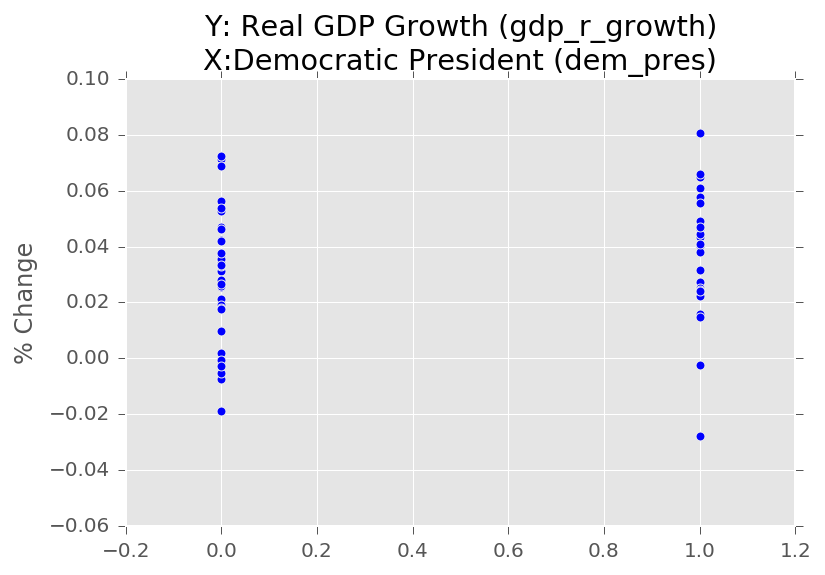

In [24]:
plt.scatter(y='gdp_r_growth', x='dem_pres', data=data)
plt.title('Y: Real GDP Growth (gdp_r_growth)\nX:Democratic President (dem_pres)')
plt.ylabel('% Change')
plt.show()

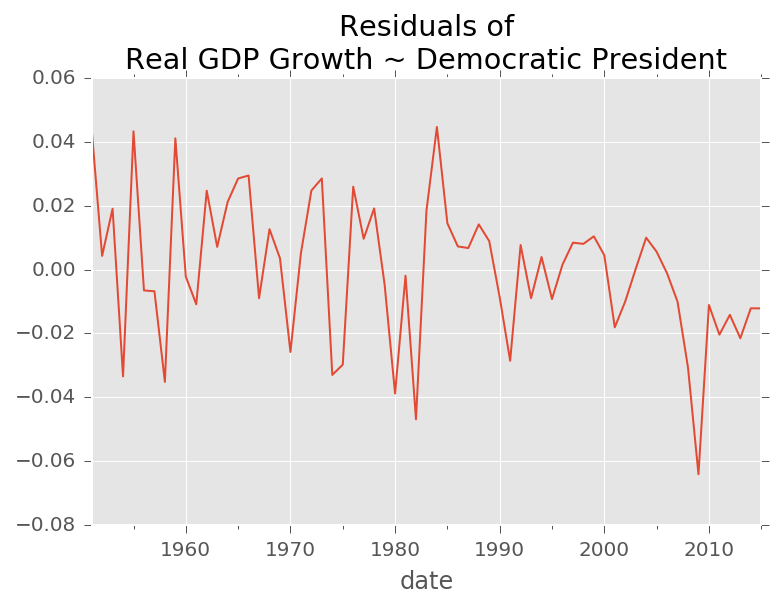

In [25]:
results.resid.plot()
plt.title('Residuals of\nReal GDP Growth ~ Democratic President')
plt.show()

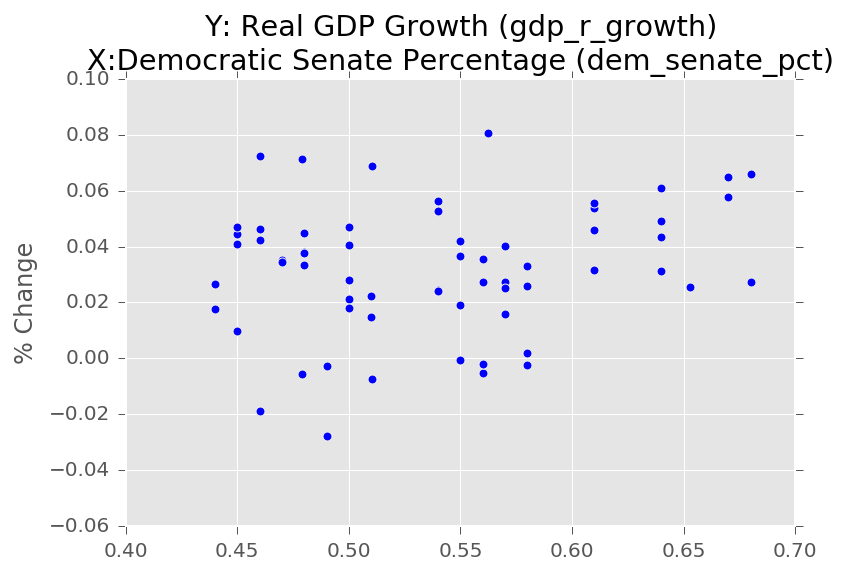

In [26]:
plt.scatter(y='gdp_r_growth', x='dem_senate_pct', data=data)
plt.title('Y: Real GDP Growth (gdp_r_growth)\nX:Democratic Senate Percentage (dem_senate_pct)')
plt.ylabel('% Change')
plt.show()

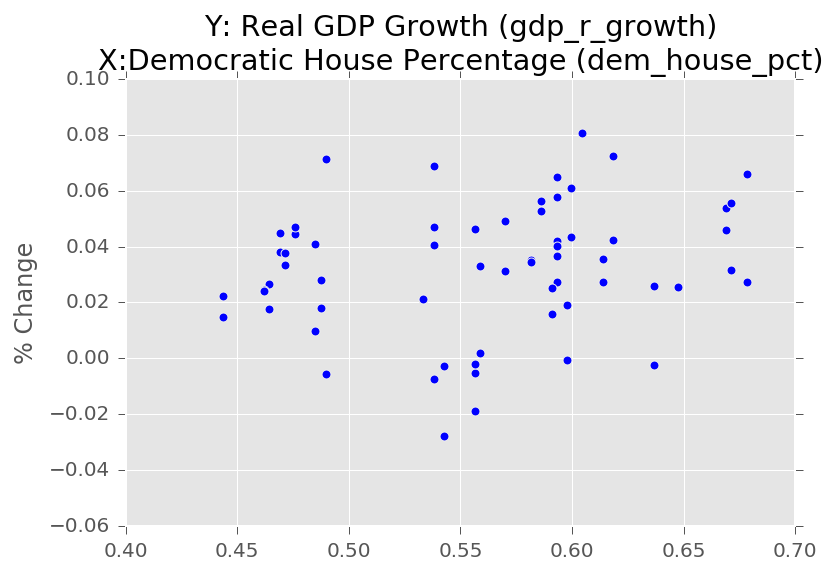

In [27]:
plt.scatter(y='gdp_r_growth', x='dem_house_pct', data=data)
plt.title('Y: Real GDP Growth (gdp_r_growth)\nX:Democratic House Percentage (dem_house_pct)')
plt.ylabel('% Change')
plt.show()

In [28]:
model = sm.ols(formula='''
gdp_r_growth ~ gdp_r_growth_lag1 + gdp_r_growth_lag2 + gdp_r_growth_lag3 + great_depression + ww2 + dem_pres + dem_senate_pct + dem_house_pct
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp_r_growth   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.090
Date:                Mon, 20 Jun 2016   Prob (F-statistic):              0.379
Time:                        00:29:59   Log-Likelihood:                 157.52
No. Observations:                  65   AIC:                            -301.0
Df Residuals:                      58   BIC:                            -285.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0066      0.026     -0.256      0.799      -0.059       0.045
gdp_r_growth_lag1     0.1688      0.127      1.333      0.188      -0.085       0.422
gdp_r_growth_lag2    -0.0260      0.121     -0.216      0.830      -0.267       0.215
gdp_r_growth_lag3    -0.0424      0.125     -0.338      0.737      -0.293       0.208
great_depression  -4.368e-16   7.41e-16     -0.589      0.558   -1.92e-15    1.05e-15
ww2                4.919e-16   8.16e-16      0.603      0.549   -1.14e-15    2.13e-15
dem_pres              0.0053      0.007      0.785      0.436      -0.008       0.019
dem_senate_pct        0.0132      0.066      0.200      0.842      -0.119       0.146
dem_house_pct         0.0456      0.064      0.717      0.476      -0.082       0.173
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.304
Skew:                          -0.157   Prob(JB):                        0.859
Kurtosis:                       3.115   Cond. No.                     4.94e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.92e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

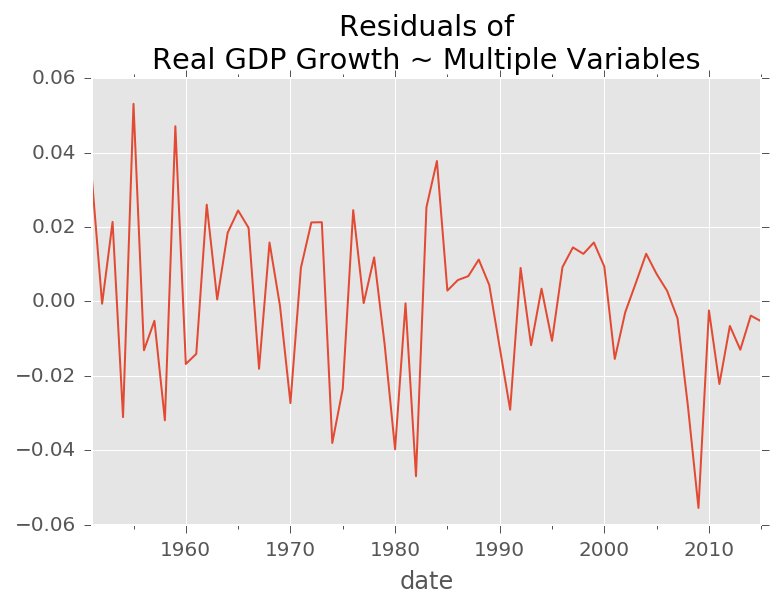

In [29]:
results.resid.plot()
plt.title('Residuals of\nReal GDP Growth ~ Multiple Variables')
plt.show()

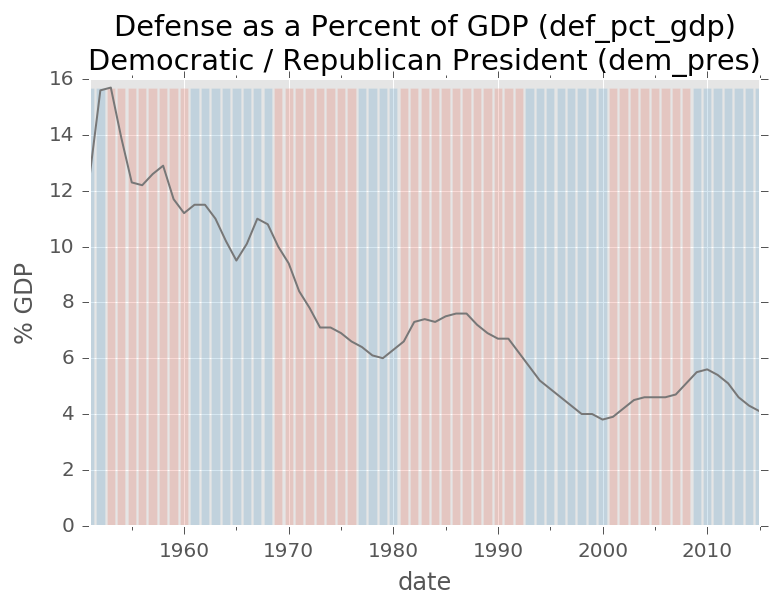

In [30]:
plot_line_with_background('def_pct_gdp', 'dem_pres', data, 
                          'Defense as a Percent of GDP (def_pct_gdp)\nDemocratic / Republican President (dem_pres)',
                          '% GDP')

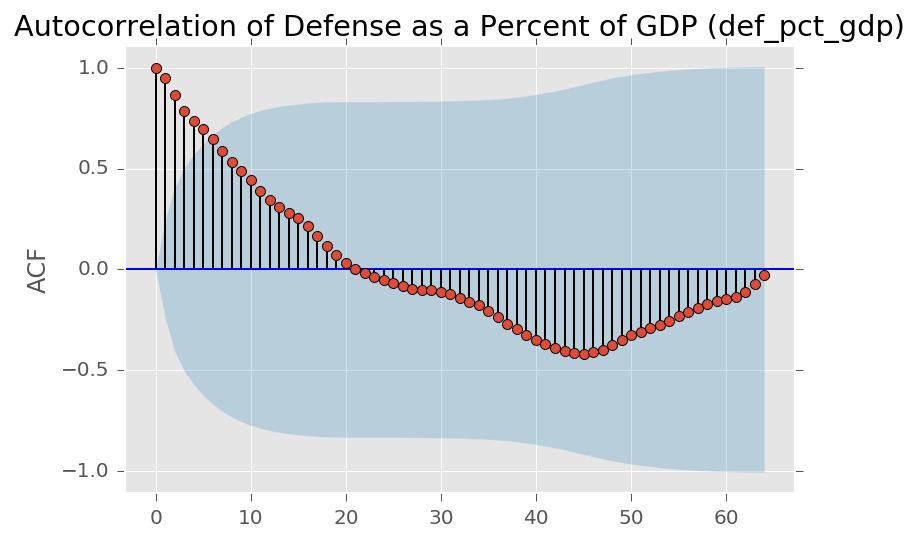

In [31]:
tsaplots.plot_acf(data['def_pct_gdp'])
plt.title('Autocorrelation of Defense as a Percent of GDP (def_pct_gdp)')
plt.ylabel('ACF')
plt.show()

In [32]:
model = sm.ols(formula='''
def_pct_gdp ~ dem_pres
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            def_pct_gdp   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8937
Date:                Mon, 20 Jun 2016   Prob (F-statistic):              0.348
Time:                        00:30:00   Log-Likelihood:                -165.63
No. Observations:                  65   AIC:                             335.3
Df Residuals:                      63   BIC:                             339.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9722      0.524     15.223      0.000       6.926       9.019
dem_pres      -0.7412      0.784     -0.945      0.348      -2.308       0.826
==============================================================================
Omnibus:                        7.499   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.899
Skew:                           0.840   Prob(JB):                       0.0193
Kurtosis:                       2.688   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

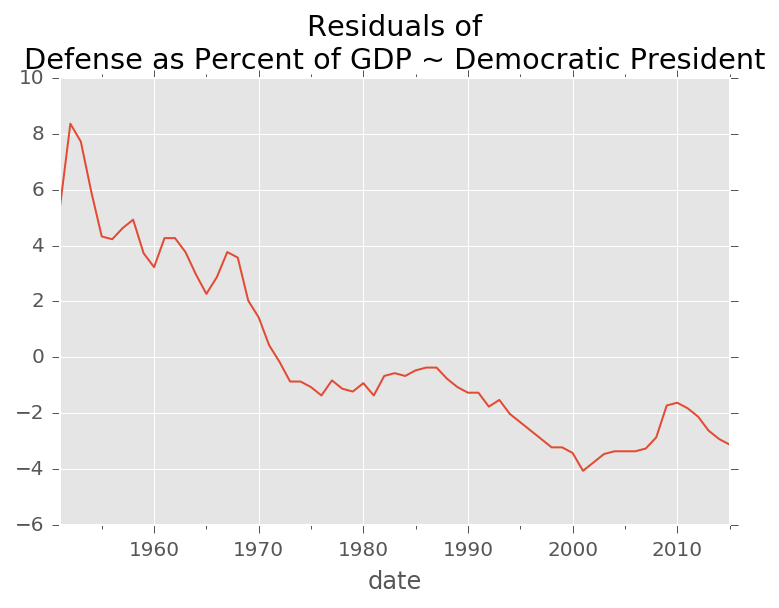

In [33]:
results.resid.plot()
plt.title('Residuals of\nDefense as Percent of GDP ~ Democratic President')
plt.show()

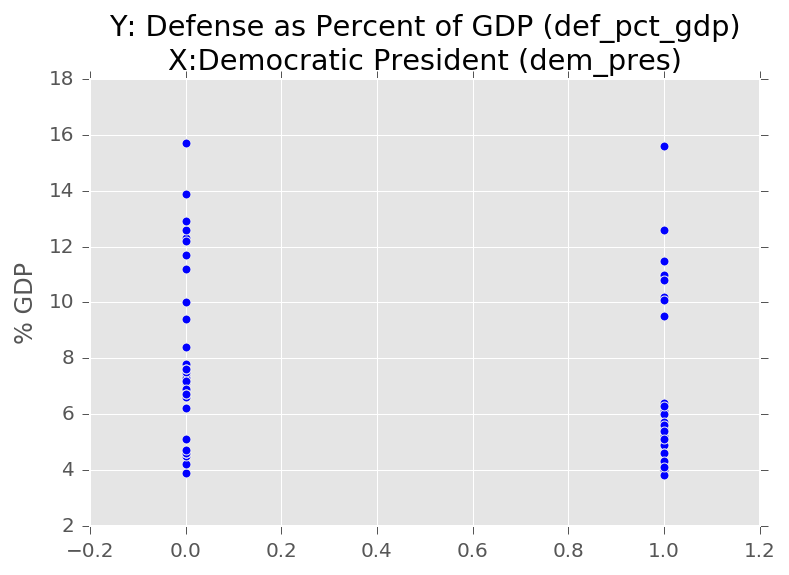

In [34]:
plt.scatter(y='def_pct_gdp', x='dem_pres', data=data)
plt.title('Y: Defense as Percent of GDP (def_pct_gdp)\nX:Democratic President (dem_pres)')
plt.ylabel('% GDP')
plt.show()

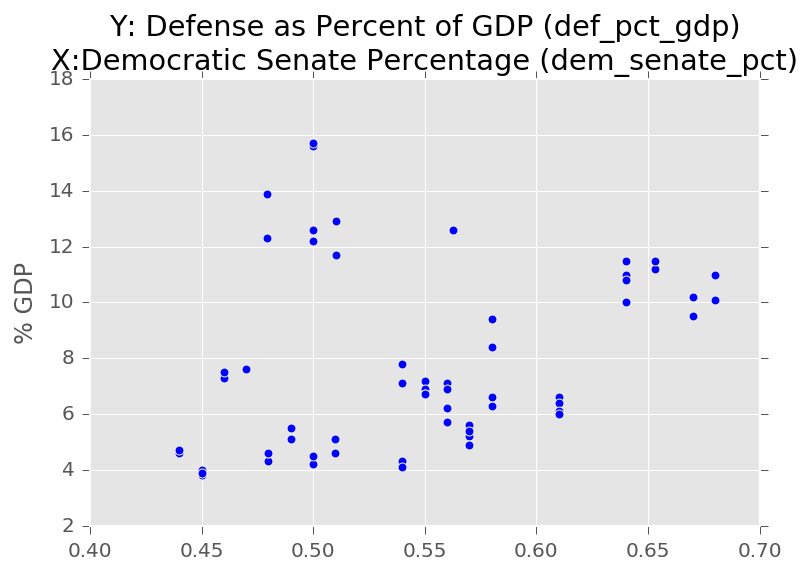

In [35]:
plt.scatter(y='def_pct_gdp', x='dem_senate_pct', data=data)
plt.title('Y: Defense as Percent of GDP (def_pct_gdp)\nX:Democratic Senate Percentage (dem_senate_pct)')
plt.ylabel('% GDP')
plt.show()

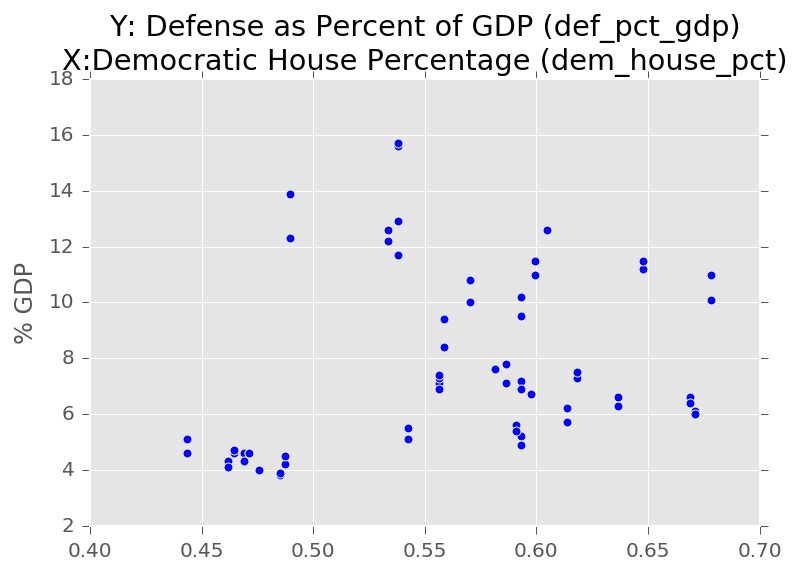

In [36]:
plt.scatter(y='def_pct_gdp', x='dem_house_pct', data=data)
plt.title('Y: Defense as Percent of GDP (def_pct_gdp)\nX:Democratic House Percentage (dem_house_pct)')
plt.ylabel('% GDP')
plt.show()

In [37]:
model = sm.ols(formula='''
def_pct_gdp ~ def_pct_gdp_lag1 + def_pct_gdp_lag2 + great_depression + ww2 + dem_pres + dem_senate_pct + dem_house_pct
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            def_pct_gdp   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     7.210
Date:                Mon, 20 Jun 2016   Prob (F-statistic):           2.52e-05
Time:                        00:30:01   Log-Likelihood:                -150.59
No. Observations:                  65   AIC:                             313.2
Df Residuals:                      59   BIC:                             326.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.8439      2.934     -1.310      0.195      -9.714       2.027
def_pct_gdp_lag1    10.3579      3.324      3.116      0.003       3.706      17.010
def_pct_gdp_lag2     6.9650      3.342      2.084      0.042       0.277      13.653
great_depression -1.142e-15   1.91e-15     -0.599      0.551   -4.96e-15    2.67e-15
ww2              -1.734e-15   1.36e-15     -1.272      0.208   -4.46e-15    9.95e-16
dem_pres            -1.5714      0.734     -2.141      0.036      -3.040      -0.103
dem_senate_pct      23.1673      7.422      3.121      0.003       8.316      38.019
dem_house_pct       -0.4527      7.029     -0.064      0.949     -14.518      13.613
==============================================================================
Omnibus:                       11.666   Durbin-Watson:                   0.270
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.926
Skew:                           0.988   Prob(JB):                      0.00257
Kurtosis:                       3.708   Cond. No.                     9.17e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

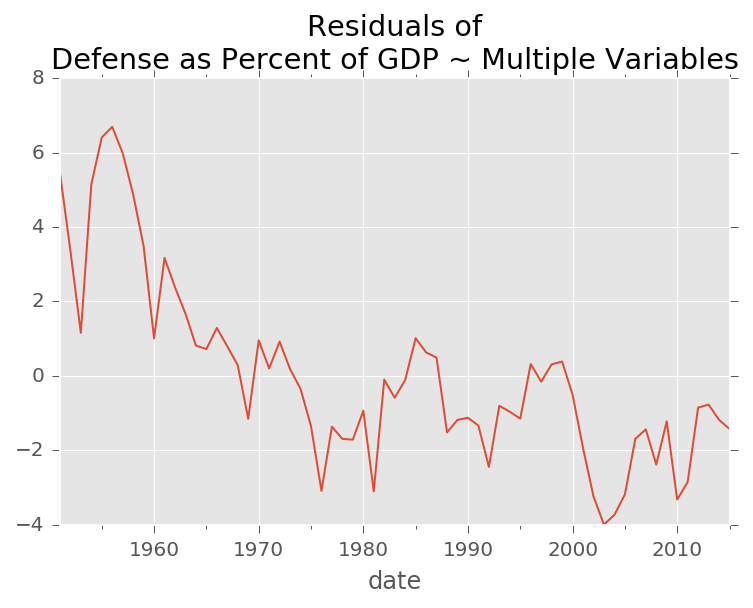

In [38]:
results.resid.plot()
plt.title('Residuals of\nDefense as Percent of GDP ~ Multiple Variables')
plt.show()

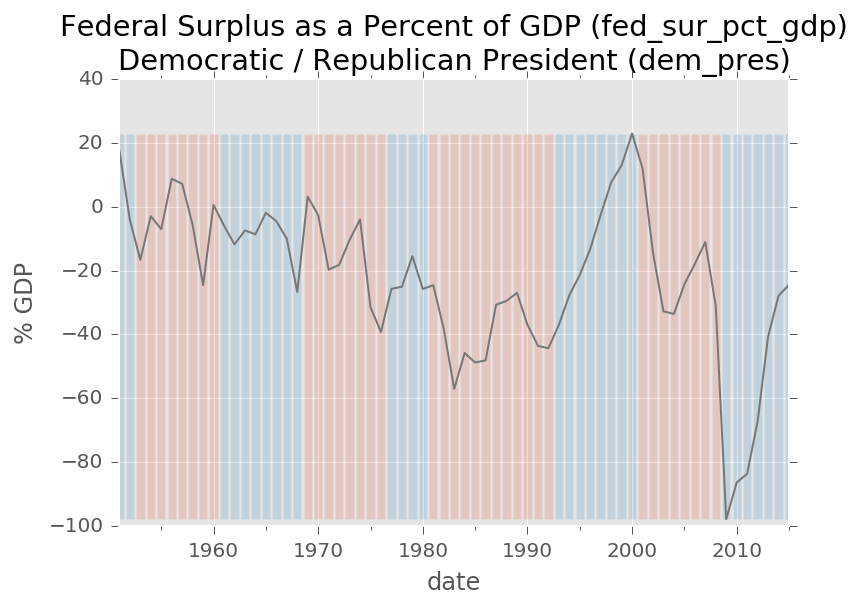

In [39]:
plot_line_with_background('fed_sur_pct_gdp', 'dem_pres', data, 
                          'Federal Surplus as a Percent of GDP (fed_sur_pct_gdp)\nDemocratic / Republican President (dem_pres)',
                          '% GDP')

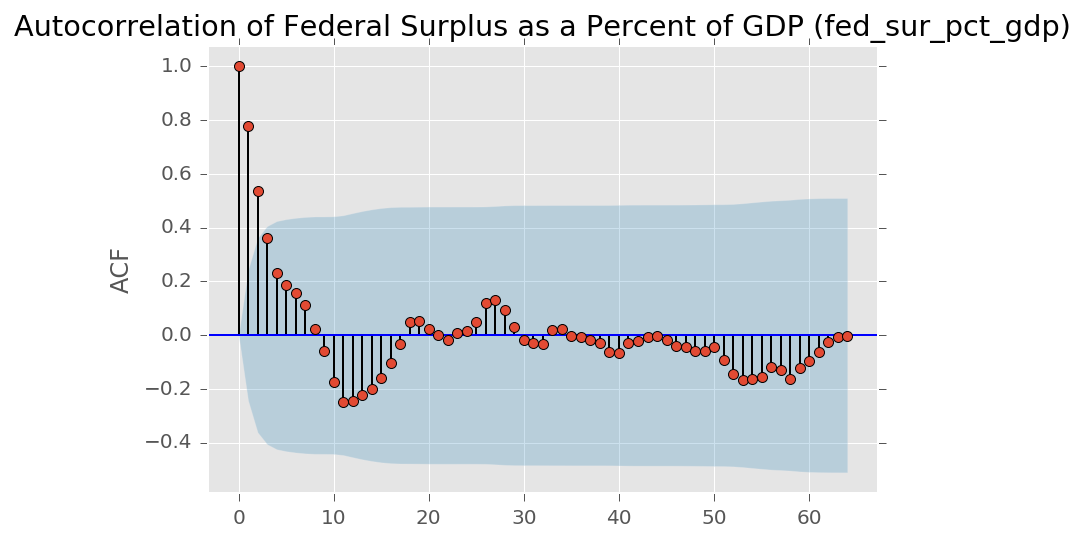

In [40]:
tsaplots.plot_acf(data['fed_sur_pct_gdp'])
plt.title('Autocorrelation of Federal Surplus as a Percent of GDP (fed_sur_pct_gdp)')
plt.ylabel('ACF')
plt.show()

In [41]:
model = sm.ols(formula='''
fed_sur_pct_gdp ~ dem_pres
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        fed_sur_pct_gdp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                 0.0009149
Date:                Mon, 20 Jun 2016   Prob (F-statistic):              0.976
Time:                        00:30:03   Log-Likelihood:                -297.73
No. Observations:                  65   AIC:                             599.5
Df Residuals:                      63   BIC:                             603.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.9831      3.996     -5.501      0.000     -29.969     -13.997
dem_pres      -0.1810      5.983     -0.030      0.976     -12.137      11.775
==============================================================================
Omnibus:                       12.003   Durbin-Watson:                   0.398
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.834
Skew:                          -0.882   Prob(JB):                      0.00163
Kurtosis:                       4.274   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

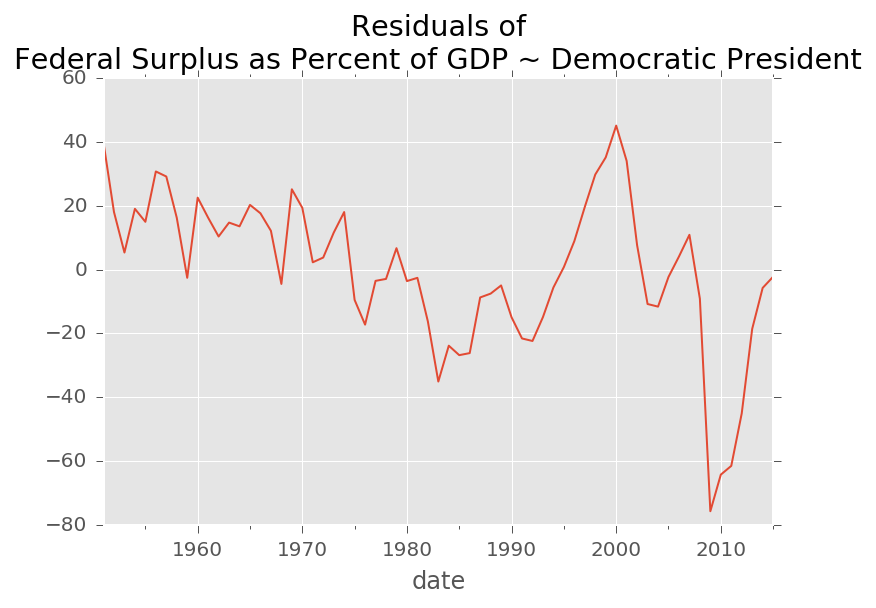

In [42]:
results.resid.plot()
plt.title('Residuals of\nFederal Surplus as Percent of GDP ~ Democratic President')
plt.show()

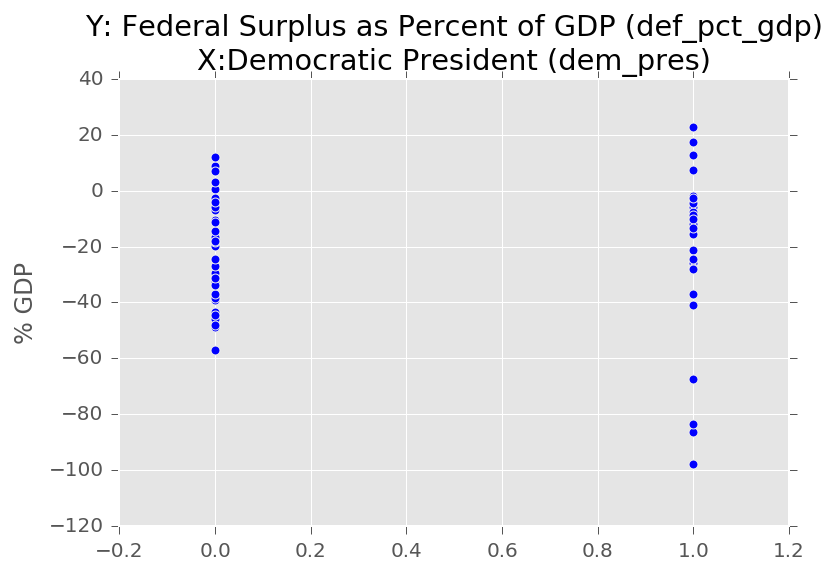

In [43]:
plt.scatter(y='fed_sur_pct_gdp', x='dem_pres', data=data)
plt.title('Y: Federal Surplus as Percent of GDP (def_pct_gdp)\nX:Democratic President (dem_pres)')
plt.ylabel('% GDP')
plt.show()

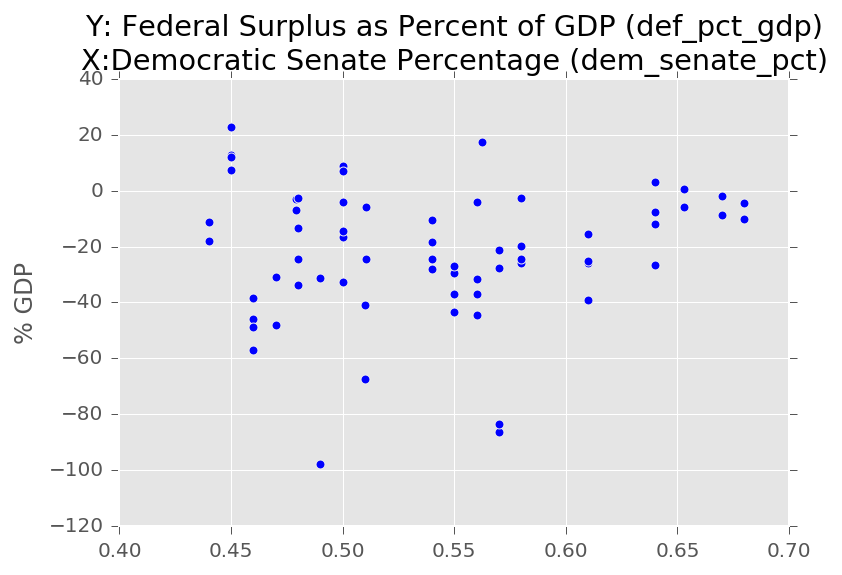

In [44]:
plt.scatter(y='fed_sur_pct_gdp', x='dem_senate_pct', data=data)
plt.title('Y: Federal Surplus as Percent of GDP (def_pct_gdp)\nX:Democratic Senate Percentage (dem_senate_pct)')
plt.ylabel('% GDP')
plt.show()

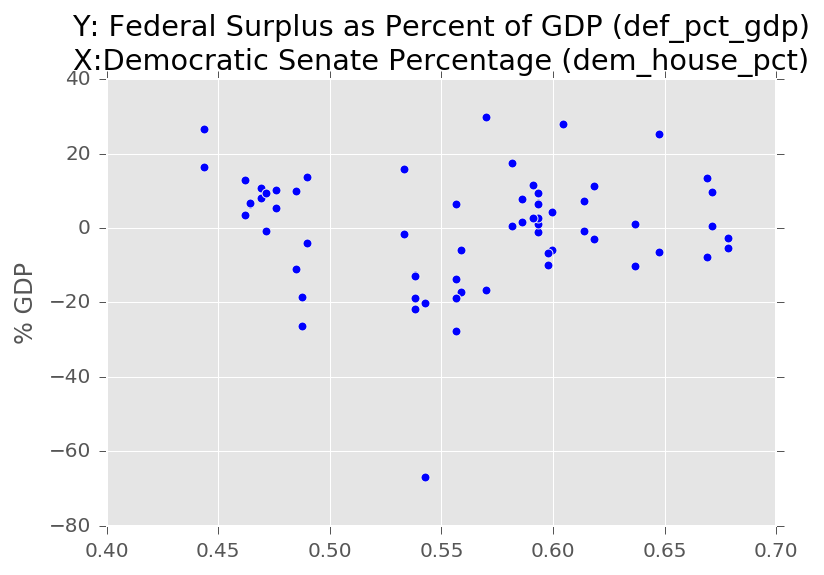

In [45]:
plt.scatter(y='fed_sur_pct_gdp_growth', x='dem_house_pct', data=data)
plt.title('Y: Federal Surplus as Percent of GDP (def_pct_gdp)\nX:Democratic Senate Percentage (dem_house_pct)')
plt.ylabel('% GDP')
plt.show()

In [46]:
model = sm.ols(formula='''
fed_sur_pct_gdp ~ great_depression + ww2 + dem_pres + dem_senate_pct + dem_house_pct
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        fed_sur_pct_gdp   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.592
Date:                Mon, 20 Jun 2016   Prob (F-statistic):              0.200
Time:                        00:30:05   Log-Likelihood:                -295.28
No. Observations:                  65   AIC:                             598.6
Df Residuals:                      61   BIC:                             607.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -17.1999     26.535     -0.648      0.519     -70.261      35.861
great_depression  1.469e-14    7.4e-15      1.986      0.052      -1e-16    2.95e-14
ww2              -2.974e-14   1.64e-14     -1.808      0.076   -6.26e-14    3.15e-15
dem_pres            -5.1282      6.501     -0.789      0.433     -18.127       7.871
dem_senate_pct     131.3066     66.272      1.981      0.052      -1.213     263.826
dem_house_pct     -131.2176     63.619     -2.063      0.043    -258.432      -4.003
==============================================================================
Omnibus:                       10.136   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.005
Skew:                          -0.720   Prob(JB):                      0.00408
Kurtosis:                       4.411   Cond. No.                     1.47e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.51e-39. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

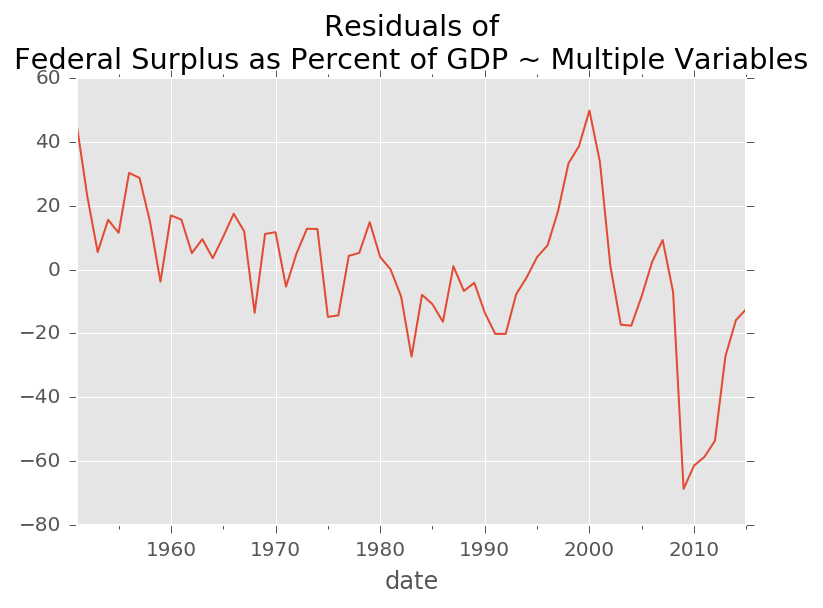

In [47]:
results.resid.plot()
plt.title('Residuals of\nFederal Surplus as Percent of GDP ~ Multiple Variables')
plt.show()

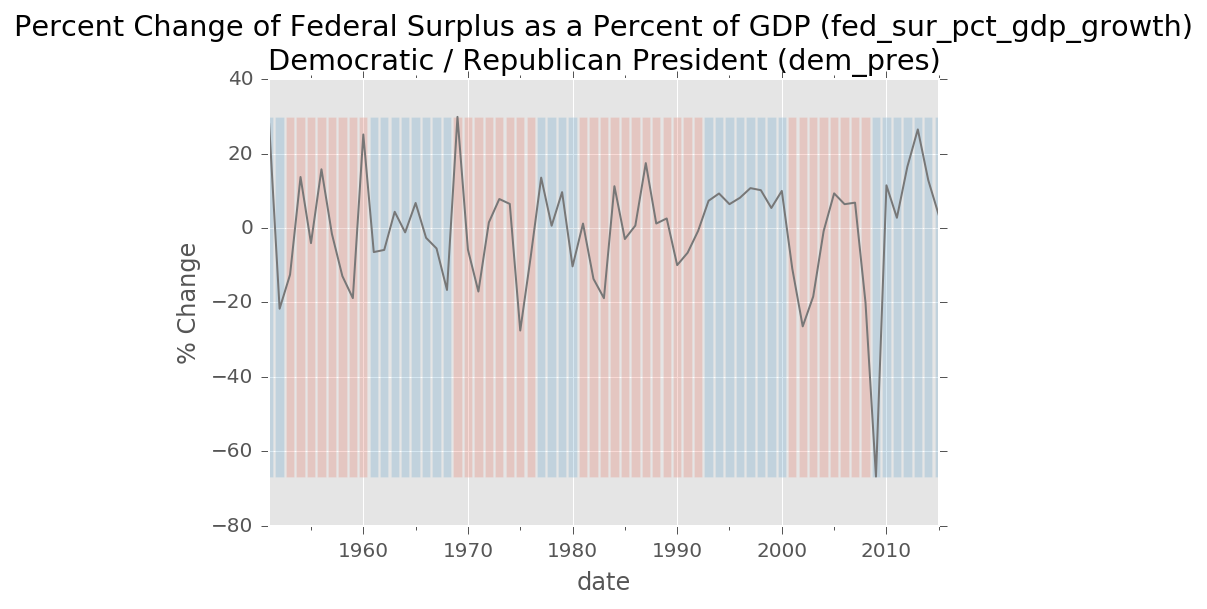

In [48]:
plot_line_with_background('fed_sur_pct_gdp_growth', 'dem_pres', data, 
                          'Percent Change of Federal Surplus as a Percent of GDP (fed_sur_pct_gdp_growth)\nDemocratic / Republican President (dem_pres)',
                          '% Change')

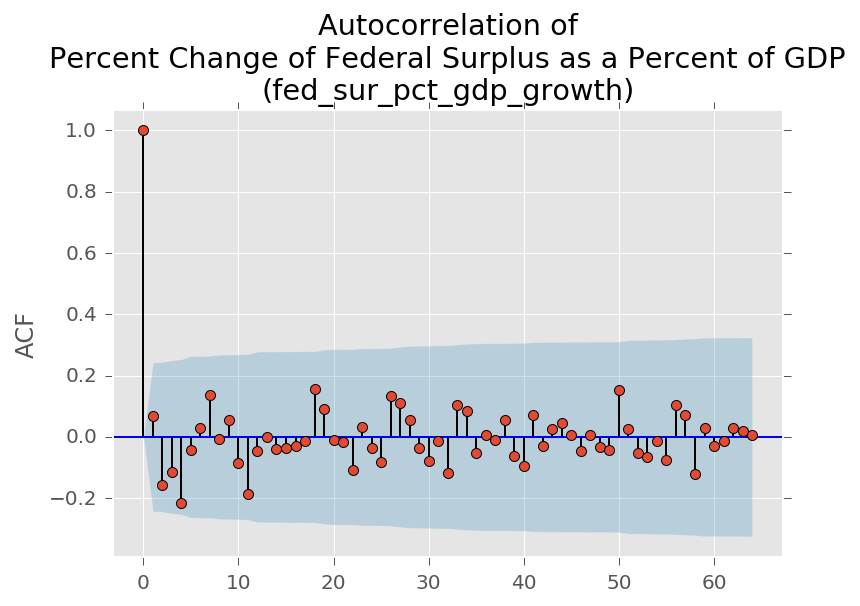

In [49]:
tsaplots.plot_acf(data['fed_sur_pct_gdp_growth'])
plt.title('Autocorrelation of\nPercent Change of Federal Surplus as a Percent of GDP\n(fed_sur_pct_gdp_growth)')
plt.ylabel('ACF')
plt.show()

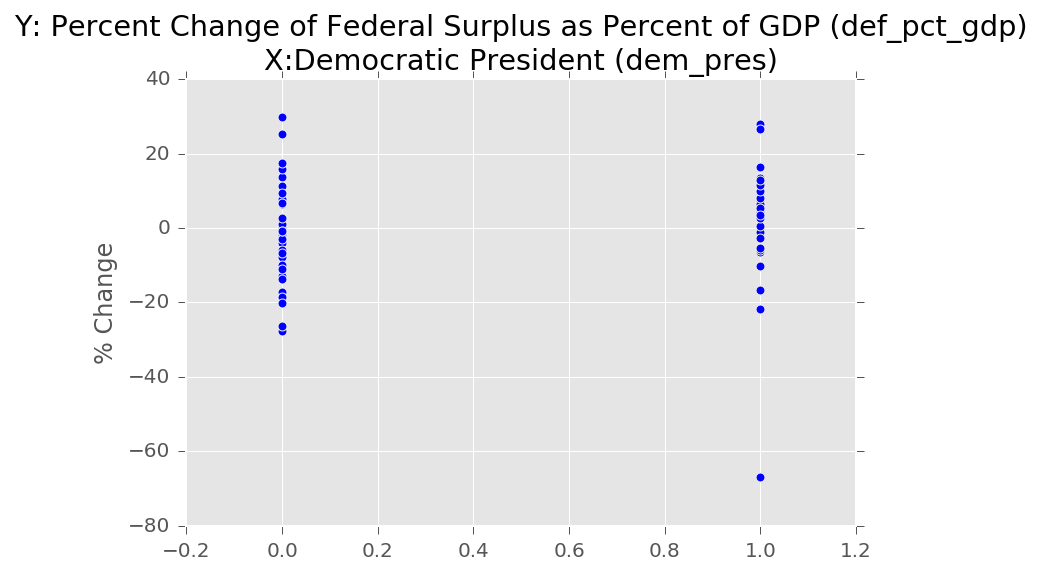

In [50]:
plt.scatter(y='fed_sur_pct_gdp_growth', x='dem_pres', data=data)
plt.title('Y: Percent Change of Federal Surplus as Percent of GDP (def_pct_gdp)\nX:Democratic President (dem_pres)')
plt.ylabel('% Change')
plt.show()

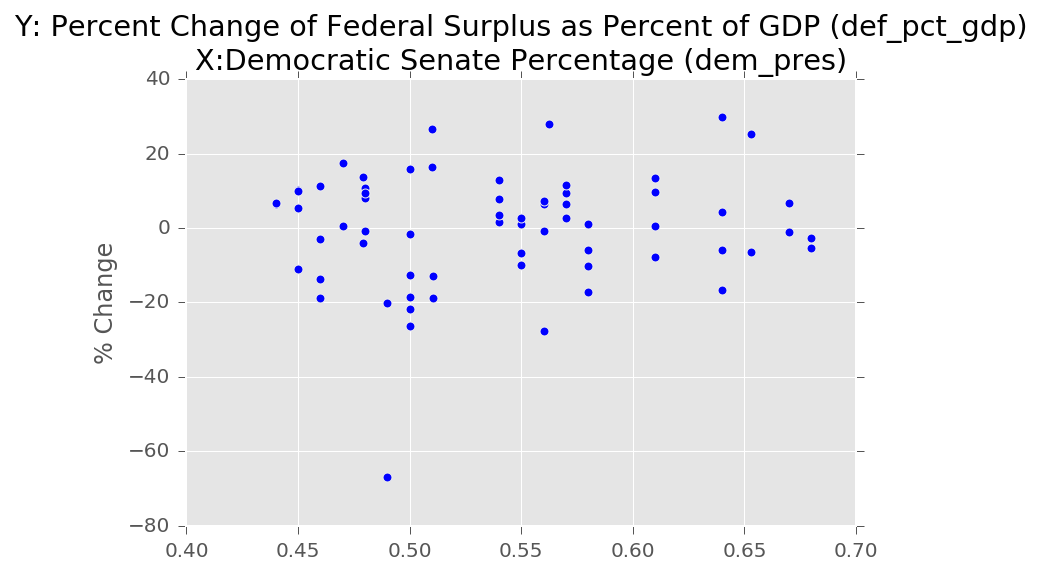

In [51]:
plt.scatter(y='fed_sur_pct_gdp_growth', x='dem_senate_pct', data=data)
plt.title('Y: Percent Change of Federal Surplus as Percent of GDP (def_pct_gdp)\nX:Democratic Senate Percentage (dem_pres)')
plt.ylabel('% Change')
plt.show()

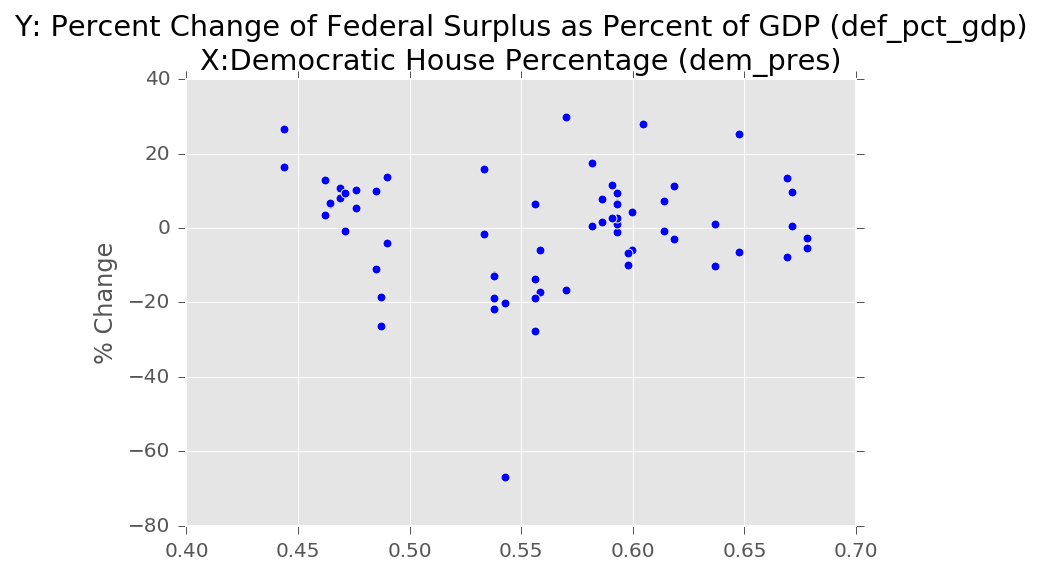

In [52]:
plt.scatter(y='fed_sur_pct_gdp_growth', x='dem_house_pct', data=data)
plt.title('Y: Percent Change of Federal Surplus as Percent of GDP (def_pct_gdp)\nX:Democratic House Percentage (dem_pres)')
plt.ylabel('% Change')
plt.show()

In [53]:
model = sm.ols(formula='''
fed_sur_pct_gdp_growth ~ great_depression + ww2 + dem_pres + dem_senate_pct + dem_house_pct
''', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     fed_sur_pct_gdp_growth   R-squared:                       0.030
Model:                                OLS   Adj. R-squared:                 -0.017
Method:                     Least Squares   F-statistic:                    0.6368
Date:                    Mon, 20 Jun 2016   Prob (F-statistic):              0.594
Time:                            00:30:07   Log-Likelihood:                -268.55
No. Observations:                      65   AIC:                             545.1
Df Residuals:                          61   BIC:                             553.8
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.6108     17.589     -0.148      0.882     -37.782      32.561
great_depression   3.88e-15    4.9e-15      0.791      0.432   -5.92e-15    1.37e-14
ww2              -6.412e-15   1.09e-14     -0.588      0.559   -2.82e-14    1.54e-14
dem_pres             3.3419      4.309      0.776      0.441      -5.275      11.958
dem_senate_pct      30.7460     43.929      0.700      0.487     -57.095     118.587
dem_house_pct      -28.0362     42.170     -0.665      0.509    -112.361      56.288
==============================================================================
Omnibus:                       27.932   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.735
Skew:                          -1.276   Prob(JB):                     2.65e-16
Kurtosis:                       7.469   Cond. No.                     1.47e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.51e-39. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

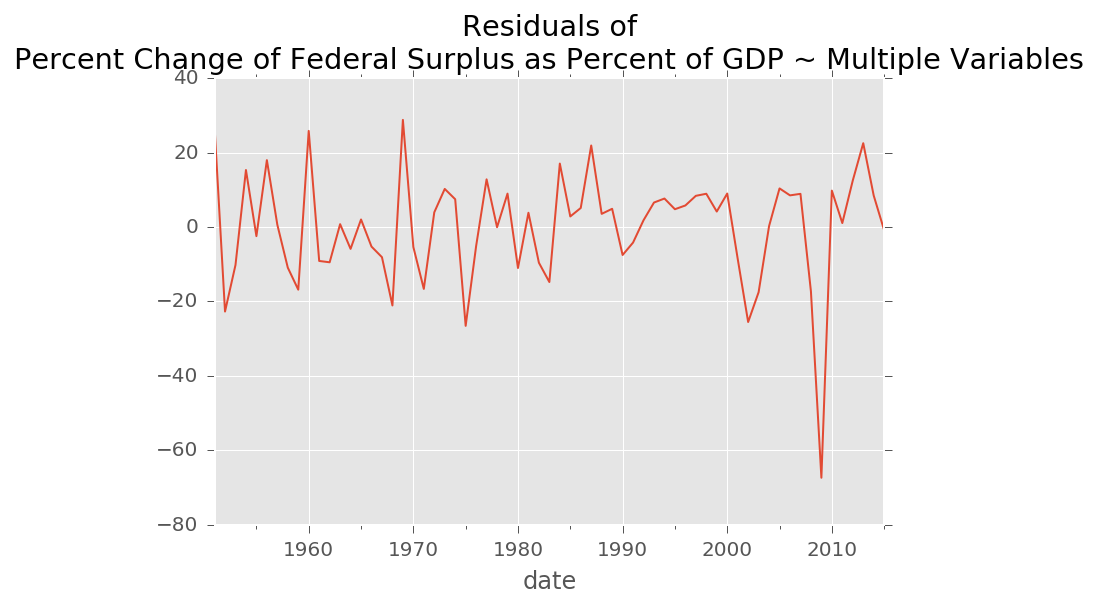

In [54]:
results.resid.plot()
plt.title('Residuals of\nPercent Change of Federal Surplus as Percent of GDP ~ Multiple Variables')
plt.show()